In [1]:
def loadAndFormatData(filename):
    data = pd.read_csv(filename, sep=", ", header=None)
    data.columns = ["x1", "x2", "x3", "x4","x5","x6","x7","x8","x9","x10","x11","x12","x13","x14","x15","x16"]
    data.drop(["x3", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16"], axis=1, inplace=True)
    return data


import pandas as pd
import numpy as np

dataLeftMost = loadAndFormatData('sonarLogLeftMost.txt')
print(dataLeftMost.head())#ix[:,6:])

dataLeft = loadAndFormatData('sonarLogLeft.txt')
# print(dataLeft.head())
dataRightMost = loadAndFormatData('sonarLogRightMost.txt')
dataRight = loadAndFormatData('sonarLogRight.txt')
dataMid = loadAndFormatData('sonarLogMid.txt')


C:\ProgramData\Miniconda2\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


      x1     x2     x4     x5     x6
0  0.460  0.424  0.421  0.787  0.388
1  0.460  0.424  0.421  0.787  0.381
2  0.460  0.426  0.421  0.787  0.381
3  0.474  0.426  0.421  0.787  0.381
4  0.474  0.426  0.532  0.787  0.361


In [2]:
dataRight.info()
dataRight.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 5 columns):
x1    2508 non-null float64
x2    2508 non-null float64
x4    2508 non-null float64
x5    2508 non-null float64
x6    2508 non-null float64
dtypes: float64(5)
memory usage: 98.0 KB


,x1,x2,x4,x5,x6
count,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000
mean,0.408563,0.368407,0.570721,1.049494,0.975150
std,0.137108,0.016134,0.270654,0.468451,0.516202
min,0.133000,0.134000,0.210000,0.272000,0.274000
25%,0.268000,0.368000,0.380000,0.690000,0.504000
50%,0.401000,0.370000,0.492000,1.038000,0.834000
75%,0.552000,0.372000,0.690000,1.363250,1.466000
max,0.576000,0.379000,1.482000,2.959000,2.959000


In [3]:

dataMid.info()
dataMid.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 5 columns):
x1    2165 non-null float64
x2    2165 non-null float64
x4    2165 non-null float64
x5    2165 non-null float64
x6    2165 non-null float64
dtypes: float64(5)
memory usage: 84.6 KB


,x1,x2,x4,x5,x6
count,2165.000000,2165.00000,2165.000000,2165.000000,2165.000000
mean,0.800315,0.37040,0.455897,0.608177,0.480047
std,0.025178,0.00849,0.246489,0.452370,0.344342
min,0.630000,0.22500,0.208000,0.210000,0.208000
25%,0.803000,0.37000,0.352000,0.392000,0.336000
50%,0.805000,0.37200,0.432000,0.487000,0.437000
75%,0.807000,0.37200,0.497000,0.536000,0.501000
max,0.815000,0.37900,2.400000,2.959000,2.959000


In [4]:
# summary
# leftmost
# mean	0.482026	0.313243	65.529			0.582719	1.145411	0.830184
# std		0.031622	0.102761	0.000			0.051666	0.611612	0.172985
# 25%		0.476000	0.223000	65.529			0.596000	0.700000	0.797000
# 50%		0.479000	0.280000	65.529			0.600000	0.993000	0.908000
# 75%		0.481000	0.455000	65.529			0.601000	1.598000	0.913000

# left
# mean	0.778038	0.369769	65.529			0.615463	0.735245	0.744816
# std		0.020352	0.063894	0.000			0.037268	0.483128	0.138863
# 25%		0.777000	0.322000	65.529			0.612000	0.407000	0.600000
# 50%		0.779000	0.400000	65.529			0.621000	0.478000	0.841000
# 75%		0.781000	0.419000	65.529			0.626000	0.920000	0.844000



# mid
# mean	0.800315	0.37040		6.552900e+01	0.455897	0.608177	0.480047
# std		0.025178	0.00849		1.421414e-14	0.246489	0.452370	0.344342
# 25%		0.803000	0.37000		6.552900e+01	0.352000	0.392000	0.336000
# 50%		0.805000	0.37200		6.552900e+01	0.432000	0.487000	0.437000
# 75%		0.807000	0.37200		6.552900e+01	0.497000	0.536000	0.501000


# right
# mean	0.408563	0.368407	6.552900e+01	0.570721	1.049494	0.975150
# std		0.137108	0.016134	1.421369e-14	0.270654	0.468451	0.516202
# 25%		0.268000	0.368000	6.552900e+01	0.380000	0.690000	0.504000
# 50%		0.401000	0.370000	6.552900e+01	0.492000	1.038000	0.834000
# 75%		0.552000	0.372000	6.552900e+01	0.690000	1.363250	1.466000


# rightmost
# mean	0.333588	0.369884	65.529			0.796697	1.189969	1.271085
# std		0.295264	0.007177	0.000			0.421964	0.451085	0.371192
# 25%		0.205000	0.370000	65.529			0.348000	0.846000	1.140000
# 50%		0.247000	0.370000	65.529			0.931000	1.317000	1.463000
# 75%		0.311000	0.372000	65.529			0.948000	1.496000	1.468000

In [5]:
# frequency ~~ 50Hz
# dataLeftMost.info()

def removeOutliers(dataFrame):
    print("before removal: ", dataFrame.shape)
    d_mean = dataFrame.mean()
    d_std = dataFrame.std()
    # dataFrame.describe()
    outlier_index = []
    for column in dataFrame:
    #     print(dataFrame[column])
        for ind, val in enumerate(dataFrame[column]):
    #         print(i, j)
            if val > (d_mean[column] + 3*d_std[column]) or val < (d_mean[column] - 3*d_std[column]):
                outlier_index.append(ind)

    outlier_index = list(set(outlier_index))
#     print(outlier_index, len(outlier_index))
    result = dataFrame.drop(dataFrame.index[outlier_index])
    result.reset_index(drop=True, inplace=True)
    print("after removal: ", result.shape)
    return result


dataLeftMost = removeOutliers(dataLeftMost)
dataLeft = removeOutliers(dataLeft)
dataRightMost = removeOutliers(dataRightMost)
dataRight = removeOutliers(dataRight)
dataMid = removeOutliers(dataMid)

('before removal: ', (2577, 5))
('after removal: ', (2421, 5))
('before removal: ', (2136, 5))
('after removal: ', (1969, 5))
('before removal: ', (2085, 5))
('after removal: ', (2013, 5))
('before removal: ', (2508, 5))
('after removal: ', (2379, 5))
('before removal: ', (2165, 5))
('after removal: ', (1932, 5))


In [6]:
def movingAvg(dataSet, winSize=5):
#     print(dataSet.head(20))    
    ma_data = dataSet.copy()
    for ind, col in enumerate(dataSet):
        ma_data[col] = dataSet[col].rolling(window=winSize).mean()

#     print(ma_data.head(20), ma_data.shape)
    ma_data.dropna(inplace=True)
    ma_data.reset_index(drop=True, inplace=True)
    print(ma_data.head(10), ma_data.shape)    
    return ma_data


# col_names =  ['MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6']
dataLeftMostMA = movingAvg(dataLeftMost,  winSize = 5)
dataLeftMA = movingAvg(dataLeft, winSize = 5)
dataRightMostMA = movingAvg(dataRightMost, winSize = 5)
dataRightMA = movingAvg(dataRight, winSize = 5)
dataMidMA = movingAvg(dataMid, winSize = 5)



(       x1      x2      x4      x5      x6
0  0.4740  0.4280  0.5728  0.4810  0.3586
1  0.4688  0.4296  0.5864  0.4082  0.3578
2  0.4636  0.4312  0.6000  0.4144  0.3580
3  0.4584  0.4340  0.6000  0.4106  0.3590
4  0.4734  0.4410  0.5836  0.4030  0.3604
5  0.4742  0.4466  0.5690  0.4096  0.4024
6  0.4802  0.4522  0.5540  0.4162  0.4444
7  0.4862  0.4578  0.5390  0.4228  0.4912
8  0.4922  0.4624  0.5240  0.4674  0.5380
9  0.4890  0.4624  0.5306  0.4896  0.5792, (2417, 5))
(       x1      x2      x4      x5      x6
0  0.7774  0.4078  0.6260  0.8842  0.7730
1  0.7774  0.4040  0.6302  0.8654  0.7890
2  0.7778  0.4006  0.6302  0.8466  0.8050
3  0.7782  0.4004  0.6302  0.8278  0.8218
4  0.7786  0.4004  0.6288  0.8316  0.8386
5  0.7790  0.4004  0.6266  0.8542  0.8380
6  0.7790  0.4006  0.6244  0.8802  0.8374
7  0.7794  0.4046  0.6244  0.9062  0.8368
8  0.7798  0.4052  0.6244  1.0078  0.8354
9  0.7802  0.4056  0.6236  1.0868  0.8340, (1965, 5))
(       x1      x2      x4      x5      x6
0  0.36

In [27]:
def labelAndCombineData(df_list):
    data_list = []
    label_list = []
    for ind, df in enumerate(df_list):
        temp = df.copy()
        label = pd.Series(ind, index=df.index, dtype=int)
        data_list.append(temp)
        label_list.append(label)
    
    return pd.concat(data_list, axis=0), pd.concat(label_list, axis=0)

com_data, com_label = labelAndCombineData([pd.concat([dataLeftMostMA, dataLeftMA], axis=0), pd.concat([dataRightMostMA, dataRightMA], axis=0), dataMid])

# print(com_data, com_label)

 

In [48]:
# feature normalization
def normalizeTrainDF(dataFrame, mode="std"):
    result = dataFrame.copy()    
    params = pd.DataFrame(index=range(len(dataFrame.columns)),columns = ["std", "mean", "min", "max"])
    
    for ind, feature_name in enumerate(dataFrame.columns):
        std_value = dataFrame[feature_name].std()
        mean_value = dataFrame[feature_name].mean()
        max_value = dataFrame[feature_name].max()
        min_value = dataFrame[feature_name].min()
        params.iloc[ind] = [std_value, mean_value, max_value, min_value]        
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / std_value) if std_value else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / (max_value - mean_value)) if (max_value - mean_value) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - min_value) / (max_value - min_value)) if (max_value - min_value) else 0

    return result, params
        
norm_data, params = normalizeTrainDF(com_data)
print(norm_data.head(), params)


def normalizeTestDF(dataFrame, params, mode="std"):
    result = dataFrame.copy()    
    
    for ind, feature_name in enumerate(dataFrame.columns):        
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - params[ind, "mean"]) / params[ind, "std"]) if std_value else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / (max_value - mean_value)) if (max_value - mean_value) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - min_value) / (max_value - min_value)) if (max_value - min_value) else 0

    return result
    


(         x1        x2        x4        x5        x6
0 -0.332929  1.211735 -0.092777 -0.977773 -1.319341
1 -0.356748  1.238488 -0.033649 -1.130047 -1.321454
2 -0.380567  1.265240  0.025478 -1.117078 -1.320926
3 -0.404386  1.312057  0.025478 -1.125027 -1.318284
4 -0.335677  1.429101 -0.045823 -1.140923 -1.314584,          std      mean     min    max
0   0.218311  0.546682   0.834  0.127
1  0.0598071   0.35553  0.4664  0.149
2   0.230011   0.59414  1.4846  0.208
3   0.478086   0.94846   2.959   0.21
4   0.378446  0.857899   2.412  0.208)


In [29]:
# dimension reduction
from sklearn.decomposition import PCA 
pca=PCA(n_components=3, copy=True, whiten=False)
reduced_data = pca.fit_transform(norm_data)
print(pca.components_, pca.n_components_, pca.explained_variance_ratio_, pca.mean_, pca.noise_variance_)




(array([[-0.53582163, -0.19286528,  0.39534053,  0.48056738,  0.53708382],
       [ 0.16775563, -0.81847335, -0.32940304,  0.37899499, -0.22319468],
       [ 0.41156163, -0.2292948 ,  0.84845474, -0.07492323, -0.22924219]]), 3, array([ 0.46837214,  0.22759624,  0.14035518]), array([  2.97553884e-16,   8.07646258e-16,   2.55046187e-16,
        -1.27523093e-16,  -1.27523093e-16]), 0.40919107241470254)


<IPython.core.display.Javascript object>


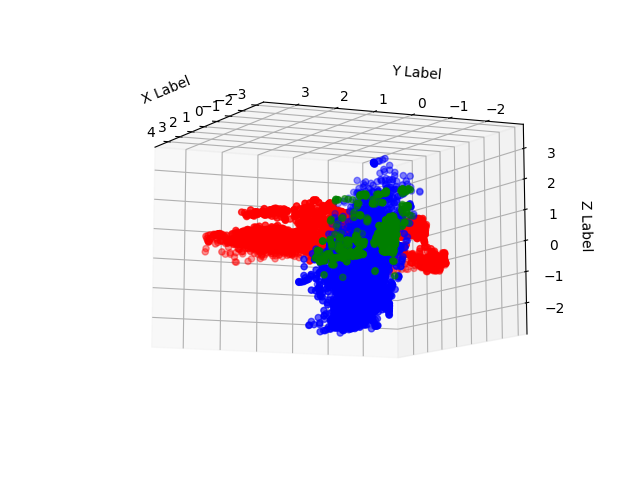

In [30]:
%matplotlib notebook
import ipympl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_data[com_label==0, 0], reduced_data[com_label==0, 1], reduced_data[com_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_data[com_label==1, 0], reduced_data[com_label==1, 1], reduced_data[com_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_data[com_label==2, 0], reduced_data[com_label==2, 1], reduced_data[com_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_data[com_label==3, 0], reduced_data[com_label==3, 1], reduced_data[com_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_data[com_label==4, 0], reduced_data[com_label==4, 1], reduced_data[com_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [31]:
from sklearn import linear_model
from sklearn import metrics, cross_validation

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(norm_data, com_label)


predicted = cross_validation.cross_val_predict(logreg, norm_data, com_label, cv=10)
print metrics.accuracy_score(com_label, predicted)
print metrics.classification_report(com_label, predicted) 


0.823892316321
             precision    recall  f1-score   support

          0       0.79      0.80      0.79      4382
          1       0.79      0.79      0.79      4384
          2       0.97      0.97      0.97      1932

avg / total       0.82      0.82      0.82     10698



In [ ]:
def makePredction():
    data = loadAndFormatData('sonarLog.txt')
    for i in range(data.shape[0]):
        current = data.iloc[i]
    
    

In [16]:
def segmentData(df, winSize=5): # offset ???
    temp_list = []
    col_names = []
    for i in range(len(df.columns)*winSize):
        col_names.append("x{}".format(i))
        
    for i in range(0, df.shape[0]-winSize, winSize):
        temp = pd.DataFrame(df.iloc[i:i+winSize, :].values.reshape(1, len(df.columns)*winSize), range(1), columns=col_names)
        
        temp_list.append(temp)
    
    
    result = pd.concat(temp_list, axis=0)
    result = result.reset_index(drop=True)
    print(result.head())
    return result
    
segLM_MA = segmentData(dataLeftMostMA)
segL_MA = segmentData(dataLeftMA)
segRM_MA = segmentData(dataRightMostMA)
segR_MA = segmentData(dataRightMA)
segM_MA = segmentData(dataMidMA)



       x0      x1      x2      x3      x4      x5      x6      x7      x8  \
0  0.4740  0.4280  0.5728  0.4810  0.3586  0.4688  0.4296  0.5864  0.4082   
1  0.4742  0.4466  0.5690  0.4096  0.4024  0.4802  0.4522  0.5540  0.4162   
2  0.5000  0.4624  0.5354  0.4976  0.5656  0.5110  0.4624  0.5406  0.5346   
3  0.5200  0.4620  0.5678  0.5782  0.5500  0.5280  0.4620  0.5714  0.5468   
4  0.4762  0.4632  0.5258  0.6028  0.6126  0.4520  0.4632  0.5264  0.6544   

       x9   ...       x15     x16     x17     x18     x19     x20     x21  \
0  0.3578   ...    0.4584  0.4340  0.6000  0.4106  0.3590  0.4734  0.4410   
1  0.4444   ...    0.4922  0.4624  0.5240  0.4674  0.5380  0.4890  0.4624   
2  0.5520   ...    0.5190  0.4620  0.5566  0.5830  0.5302  0.5120  0.4620   
3  0.5680   ...    0.5096  0.4632  0.5438  0.5448  0.5974  0.5004  0.4632   
4  0.6206   ...    0.4520  0.4612  0.5564  0.6968  0.6220  0.4520  0.4612   

      x22     x23     x24  
0  0.5836  0.4030  0.3604  
1  0.5306  0.4896 

In [42]:
com_seg_data, com_seg_label = labelAndCombineData([pd.concat([segLM_MA, segL_MA], axis=0), pd.concat([segRM_MA, segR_MA], axis=0), segM_MA])
# print(com_seg_data, com_seg_label)

norm_seg_data = normalizeTrainDF(com_seg_data)
print(norm_seg_data.head())

pca=PCA(n_components=3, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)



         x0        x1        x2        x3        x4        x5        x6  \
0 -0.333025  1.210749 -0.094469 -0.983561 -1.325068 -0.355891  1.237844   
1 -0.332108  1.521585 -0.111051 -1.133755 -1.208844 -0.303707  1.615529   
2 -0.213700  1.785629 -0.257671 -0.948642 -0.775791 -0.162720  1.785988   
3 -0.121912  1.778944 -0.116287 -0.779097 -0.817186 -0.084902  1.779303   
4 -0.322929  1.798998 -0.299562 -0.727349 -0.651076 -0.432793  1.799358   

         x7        x8        x9    ...          x15       x16       x17  \
0 -0.034961 -1.136823 -1.330148    ...    -0.403259  1.311360  0.024740   
1 -0.176267 -1.119995 -1.099871    ...    -0.248577  1.785738 -0.307581   
2 -0.234709 -0.870933 -0.813754    ...    -0.125929  1.779056 -0.165033   
3 -0.100381 -0.845270 -0.771209    ...    -0.168947  1.799100 -0.221003   
4 -0.296639 -0.618926 -0.631342    ...    -0.432549  1.765694 -0.165908   

        x18       x19       x20       x21       x22       x23       x24  
0 -1.140540 -1.322646 -0

<IPython.core.display.Javascript object>


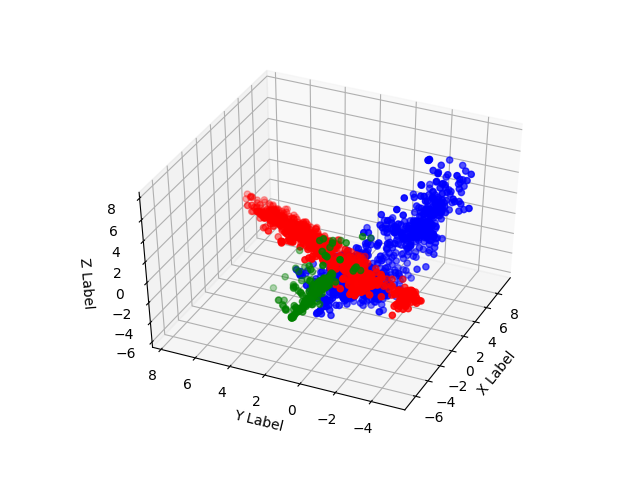

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_seg_data[com_seg_label==0, 0], reduced_seg_data[com_seg_label==0, 1], reduced_seg_data[com_seg_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==1, 0], reduced_seg_data[com_seg_label==1, 1], reduced_seg_data[com_seg_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==2, 0], reduced_seg_data[com_seg_label==2, 1], reduced_seg_data[com_seg_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==3, 0], reduced_seg_data[com_seg_label==3, 1], reduced_seg_data[com_seg_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==4, 0], reduced_seg_data[com_seg_label==4, 1], reduced_seg_data[com_seg_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [41]:
logreg = linear_model.LogisticRegression(C=10)

pca=PCA(n_components=5, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(reduced_seg_data, com_seg_label)


predicted = cross_validation.cross_val_predict(logreg, reduced_seg_data, com_seg_label, cv=10)
print metrics.accuracy_score(com_seg_label, predicted)
print metrics.classification_report(com_seg_label, predicted) 

0.817798594848
             precision    recall  f1-score   support

          0       0.78      0.79      0.78       875
          1       0.79      0.79      0.79       875
          2       0.95      0.96      0.95       385

avg / total       0.82      0.82      0.82      2135

